# Multiple Linear Regression (MLR)

The performance of the MLR model will be assessed using various metrics:

    Mean Squared Error (MSE): Measures the average squared difference between the observed and predicted values. A lower MSE indicates better model performance.
    R-squared (R²): Represents the proportion of variance in the dependent variable that is explained by the independent variables. An R² value closer to 1 indicates a better fit.


For this dataset, the Multiple Linear Regression (MLR) model's performance metrics are as follows:

 # Mean Squared Error (MSE): 1,880,489.72
 #  R-squared (R²): 0.699

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('mlr9.csv')

In [3]:
df

,y,x1,x2,x3
0,17134.302088,50.389973,200.347091,C
1,17707.238688,57.115923,199.745367,C
2,15887.141362,55.314841,200.961109,B
3,12694.912392,43.529562,193.130283,B
4,16671.074791,45.850871,199.216353,A
...,...,...,...,...
995,14774.180721,49.093853,204.527019,B
996,15639.454569,51.885320,194.221461,B
997,17027.012112,52.642655,204.838020,A
998,18091.426059,51.246059,201.706663,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1000 non-null   float64
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 31.4+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,y,x1,x2
count,1000.000000,1000.000000,1000.000000
mean,15491.595187,50.047562,200.058999
std,2244.461262,6.206056,4.188282
min,7873.227124,27.656374,182.061275
25%,14155.911429,46.942177,197.740094
50%,15511.116016,50.066816,200.027120
75%,16831.916038,53.194347,202.590415
max,23972.448449,72.289283,215.352198


In [7]:
df.describe(include='object')

,x3
count,1000
unique,3
top,B
freq,398


# Visualizing Dataset

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

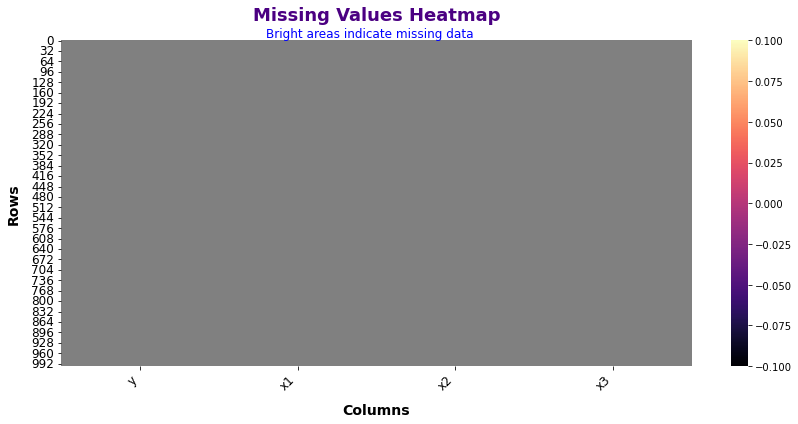

In [9]:
# Adjusting layout for better readability
plt.figure(figsize=(12, 6))  # Set figure size
sns.heatmap(
    df.isnull(),  # Visualize missing values
    cbar=True,  # Include color bar
    cmap="magma",  # Vibrant color palette
    linewidths=0.5,  # Gridlines for separation
    linecolor='gray'
)

# Title and labels with alignment adjustments
plt.title("Missing Values Heatmap", fontsize=18, fontweight='bold', color='#4B0082', pad=20)
plt.xlabel("Columns", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Rows", fontsize=14, fontweight='bold', labelpad=10)

# Rotate column labels for better alignment
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align to the right
plt.yticks(fontsize=12)
plt.annotate(
    "Bright areas indicate missing data",
    xy=(1, 1), xytext=(1.3, -10),
    fontsize=12, color='blue'
)
# Add spacing for proper alignment
plt.tight_layout()

# Display the heatmap
plt.show()


In [10]:
missing_summary = df.isnull().mean() * 100
print("Missing Data Summary (%):")
print(missing_summary)

Missing Data Summary (%):
y     0.0
x1    0.0
x2    0.0
x3    0.0
dtype: float64


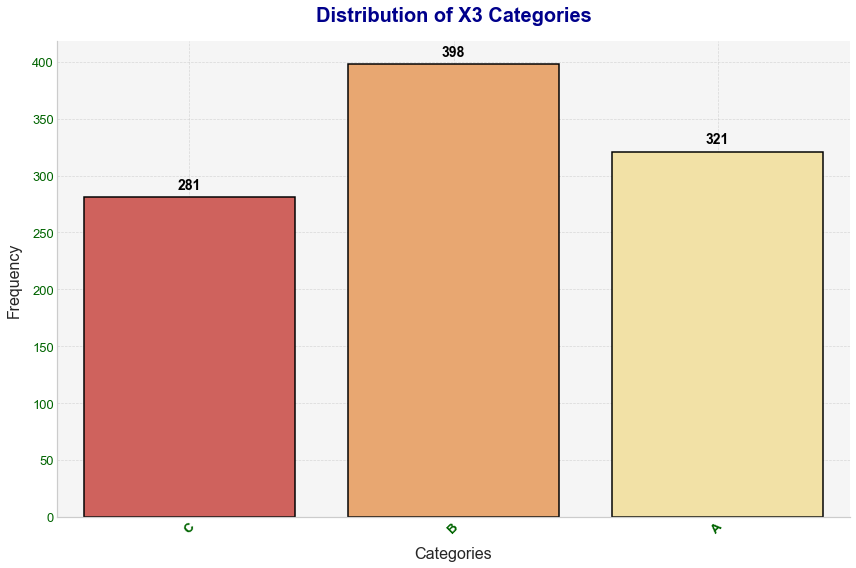

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set a style for the plot
sns.set_style("whitegrid")

# Create a vibrant color palette
custom_palette = sns.color_palette("Spectral", as_cmap=False)

# Create the count plot
fig, ax = plt.subplots(figsize=(12, 8))  # Larger figure size for maximum visual impact
plot_count = sns.countplot(data=df, x='x3', palette=custom_palette, ax=ax, edgecolor="black", linewidth=1.5)

# Add data labels on top of the bars
for container in plot_count.containers:
    plot_count.bar_label(container, fmt='%d', label_type='edge', fontsize=14, padding=5, color='black', fontweight='bold')

# Enhance plot title and labels
ax.set_title("Distribution of X3 Categories", fontsize=20, fontweight='bold', color="darkblue", pad=20)
ax.set_xlabel("Categories", fontsize=16, labelpad=10)
ax.set_ylabel("Frequency", fontsize=16, labelpad=10)

# Customize spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=13, color="darkgreen", fontweight='bold')
plt.yticks(fontsize=13, color="darkgreen")

# Add a subtle background gradient to the chart
ax.set_facecolor('#f5f5f5')

# Add a legend (optional, if categories need clarification)
handles, labels = plot_count.get_legend_handles_labels()
if labels:
    ax.legend(handles, labels, title="Legend", fontsize=12, title_fontsize=14, loc='upper right', frameon=False)

# Add gridlines for a polished look
ax.grid(visible=True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



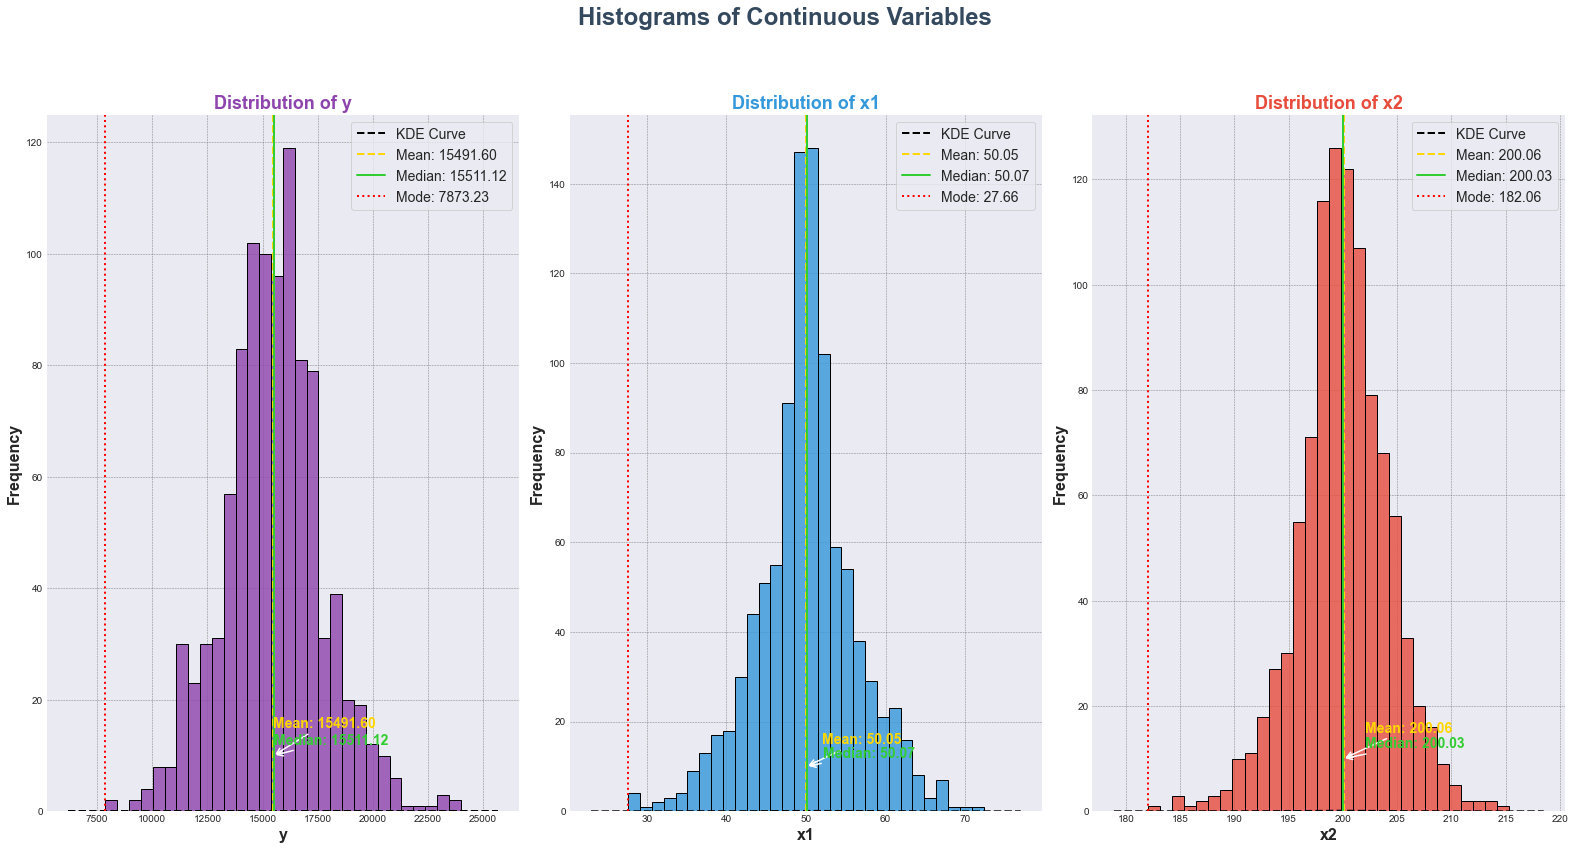

In [15]:

# Set a style
plt.style.use('seaborn-darkgrid')

# Define the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(22, 12))  # Larger figure for better visibility
variables = ['y', 'x1', 'x2']
colors = ['#8E44AD', '#3498DB', '#E74C3C']

# Loop through variables to create customized histograms
for i, var in enumerate(variables):
    # Plot histogram
    sns.histplot(
        df[var], bins=30, color=colors[i], edgecolor='black', alpha=0.8, ax=axes[i]
    )
    
    # Overlay KDE curve using sns.kdeplot
    sns.kdeplot(
        df[var], ax=axes[i], color='black', linestyle='--', linewidth=2,
        label='KDE Curve'
    )

    # Calculate key statistics
    mean_val = df[var].mean()
    median_val = df[var].median()
    mode_val = df[var].mode()[0]

    # Add vertical lines for mean, median, and mode
    axes[i].axvline(mean_val, color='gold', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='limegreen', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i].axvline(mode_val, color='red', linestyle=':', linewidth=2, label=f'Mode: {mode_val:.2f}')

    # Annotate mean and median on the plot
    axes[i].annotate(
        f"Mean: {mean_val:.2f}", 
        xy=(mean_val, 10), 
        xytext=(mean_val + 2, 15),
        arrowprops=dict(facecolor='gold', arrowstyle='->', lw=1.5), 
        fontsize=14, color='gold', weight='bold'
    )
    axes[i].annotate(
        f"Median: {median_val:.2f}", 
        xy=(median_val, 10), 
        xytext=(median_val + 2, 12),
        arrowprops=dict(facecolor='limegreen', arrowstyle='->', lw=1.5), 
        fontsize=14, color='limegreen', weight='bold'
    )

    # Customize titles and labels with larger font sizes
    axes[i].set_title(f"Distribution of {var}", fontsize=18, fontweight='bold', color=colors[i])
    axes[i].set_xlabel(f"{var}", fontsize=16, fontweight='bold')
    axes[i].set_ylabel("Frequency", fontsize=16, fontweight='bold')

    # Add a legend with larger font
    axes[i].legend(fontsize=14, loc='upper right', frameon=True)

    # Add gridlines for better readability
    axes[i].grid(color='gray', linestyle='--', linewidth=0.5)

# Add a global title for the figure with larger font
fig.suptitle("Histograms of Continuous Variables ", fontsize=24, fontweight='bold', color='#34495E')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjust for the global title

# Display the final plot
plt.show()


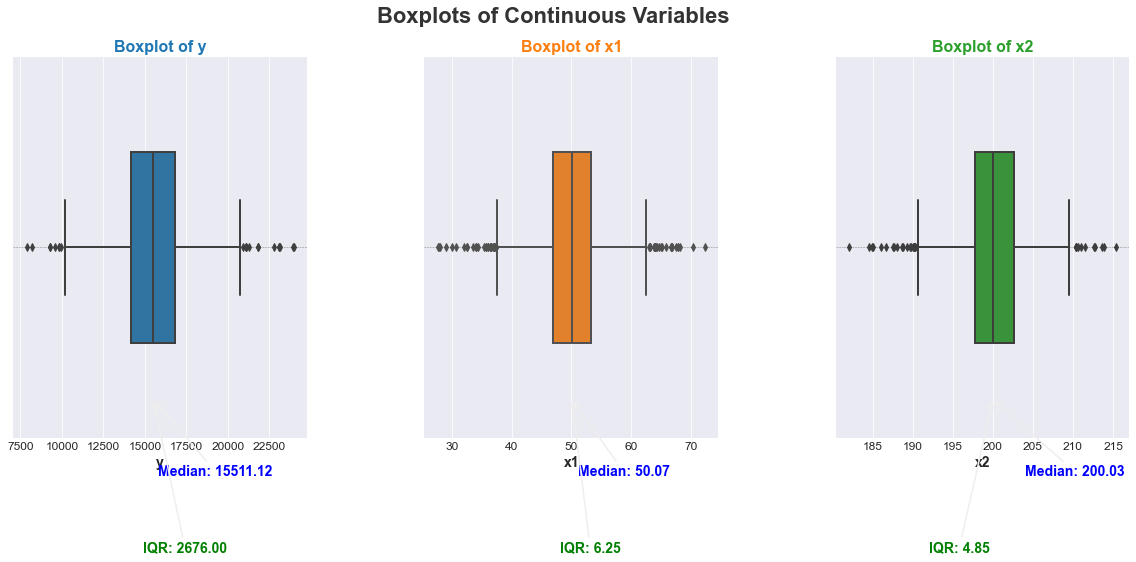

In [58]:

# Set figure size and layout for better visibility
fig, axes = plt.subplots(1, 3, figsize=(20, 7))  # Create a 1x3 grid layout with ample space
axes = axes.flatten()  # Flatten axes for easier indexing

# Set a professional style for the plot
plt.style.use('seaborn-darkgrid')  # Use a clean and visually appealing grid style

# Define variables to plot and their respective colors for differentiation
variables = ['y', 'x1', 'x2']  # List of variables for boxplots
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Colors for each variable's boxplot

# Loop through each variable to create subplots for boxplots
for i, (var, color) in enumerate(zip(variables, colors)):  # Enumerate to track variable and subplot index
    sns.boxplot(
        data=df, x=var, color=color,  # Assign data and unique color
        linewidth=2, width=0.5, ax=axes[i]  # Specify the subplot axis
    )
    
    # Add horizontal gridlines for better readability
    axes[i].grid(color='gray', linestyle='--', linewidth=0.5, axis='y')

    # Calculate key statistics for annotations
    median_val = df[var].median()  # Calculate the median value
    iqr_val = df[var].quantile(0.75) - df[var].quantile(0.25)  # Calculate the IQR (Q3 - Q1)

    # Annotate the median on the plot
    axes[i].annotate(
        f"Median: {median_val:.2f}",  # Label text
        xy=(median_val, 0.4),  # Coordinates for the arrow
        xytext=(median_val + median_val * 0.02, 0.6),  # Adjusted position for better visibility
        arrowprops=dict(facecolor='blue', arrowstyle='->', lw=1.5),  # Arrow styling
        fontsize=14, color='blue', fontweight='bold'  # Annotation text styling
    )
    
    # Annotate the IQR on the plot
    axes[i].annotate(
        f"IQR: {iqr_val:.2f}",  # Label text for IQR
        xy=(median_val, 0.4),  # Coordinates for the arrow
        xytext=(median_val - median_val * 0.04, 0.8),  # Adjusted position for better visibility
        arrowprops=dict(facecolor='green', arrowstyle='->', lw=1.5),  # Arrow styling
        fontsize=14, color='green', fontweight='bold'  # Annotation text styling
    )

    # Set the title for the subplot with unique color
    axes[i].set_title(
        f"Boxplot of {var}",  # Title text
        fontsize=16, fontweight='bold', color=color  # Styling for the title
    )

    # Customize the x-axis label for the current variable
    axes[i].set_xlabel(
        f"{var}",  # Label text
        fontsize=14, fontweight='bold'  # Styling for the x-axis label
    )
    
    # Customize x-axis tick label size
    axes[i].tick_params(axis='x', labelsize=12)

# Add a global title for the entire figure
fig.suptitle(
    "Boxplots of Continuous Variables",  # Main title text
    fontsize=22, fontweight='bold', color='#333333'  # Styling for the global title
)

# Adjust layout to ensure proper spacing and avoid overlap
fig.subplots_adjust(top=0.88, wspace=0.4, hspace=0.4)  # Adjust spacing between subplots

# Display the final boxplots
plt.show()


In [16]:
import numpy as np

def calculate_outlier_bounds(column):
    """
    Calculate the lower and upper bounds for detecting outliers using the IQR method.
    
    Parameters:
    column (array-like): Input data (list, NumPy array, or Pandas Series) for which outlier bounds are calculated.
    
    Returns:
    tuple: A tuple containing the lower and upper bounds for detecting outliers.
    """
    # Calculate the 25th (Q1) and 75th (Q3) percentiles
    q1, q3 = np.percentile(column, [25, 75])
    
    # Calculate the interquartile range (IQR)
    interquartile_range = q3 - q1
    
    # Compute the lower bound for outliers
    lower_bound = q1 - 1.5 * interquartile_range
    
    # Compute the upper bound for outliers
    upper_bound = q3 + 1.5 * interquartile_range
    
    # Return the calculated bounds as a tuple
    return lower_bound, upper_bound

# Example Usage:
# Assuming 'x1' is a column in your DataFrame (df['x1']):
lower, upper = calculate_outlier_bounds(df['x1'])

# Print the bounds for outliers
print(f"Outlier bounds for x1: Lower = {lower:.2f}, Upper = {upper:.2f}")


Outlier bounds for x1: Lower = 37.56, Upper = 62.57


In [17]:
# Loop through selected columns to apply outlier treatment
for m in ['y', 'x1', 'x2']:
    # Step 1: Calculate the outlier bounds for the current column
    lower_bound, upper_bound = calculate_outlier_bounds(df[m])
    
    # Step 2: Count the number of outliers above the upper bound
    upper_outliers = (df[m] > upper_bound).sum()
    
    # Step 3: Count the number of outliers below the lower bound
    lower_outliers = (df[m] < lower_bound).sum()
    
    # Step 4: Replace values above the upper bound with the upper bound
    df[m] = np.where(df[m] > upper_bound, upper_bound, df[m])
    
    # Step 5: Replace values below the lower bound with the lower bound
    df[m] = np.where(df[m] < lower_bound, lower_bound, df[m])
    
    # Step 6: Print a summary of the outlier treatment for the current column
    print(f"Column '{m}':")
    print(f"  - Upper outliers capped: {upper_outliers}")
    print(f"  - Lower outliers capped: {lower_outliers}")
    print(f"  - Bounds: Lower = {lower_bound:.2f}, Upper = {upper_bound:.2f}\n")


Column 'y':
  - Upper outliers capped: 13
  - Lower outliers capped: 8
  - Bounds: Lower = 10141.90, Upper = 20845.92

Column 'x1':
  - Upper outliers capped: 25
  - Lower outliers capped: 33
  - Bounds: Lower = 37.56, Upper = 62.57

Column 'x2':
  - Upper outliers capped: 12
  - Lower outliers capped: 20
  - Bounds: Lower = 190.46, Upper = 209.87



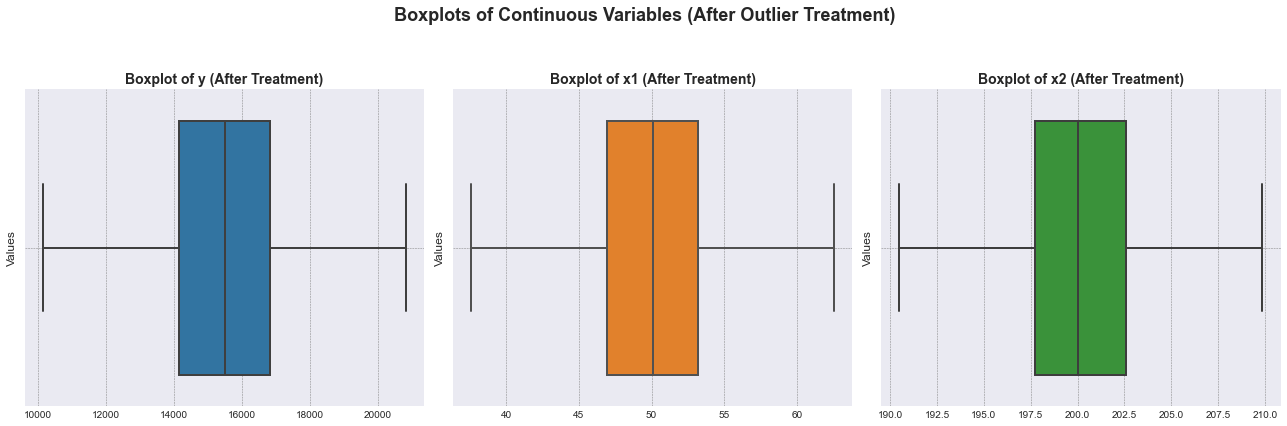

In [18]:

# Set up the figure for a 1x3 layout
plt.figure(figsize=(18, 6))  # A wide figure for three side-by-side boxplots

# Define variables and their respective colors
variables = ['y', 'x1', 'x2']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Loop through variables to create boxplots
for i, var in enumerate(variables):
    plt.subplot(1, 3, i + 1)  # Create a subplot (1 row, 3 columns)
    sns.boxplot(data=df, x=var, color=colors[i], linewidth=2)  # Plot the treated data
    plt.title(f"Boxplot of {var} (After Treatment)", fontsize=14, fontweight='bold')  # Title
    plt.xlabel("")  # Remove redundant x-axis label
    plt.ylabel("Values", fontsize=12)  # Y-axis label
    plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines for readability

# Add a global title
plt.suptitle("Boxplots of Continuous Variables (After Outlier Treatment)", fontsize=18, fontweight='bold')

# Adjust layout for proper spacing
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Leave space for the global title

# Show the final plot
plt.show()


# Bivariate Analysis

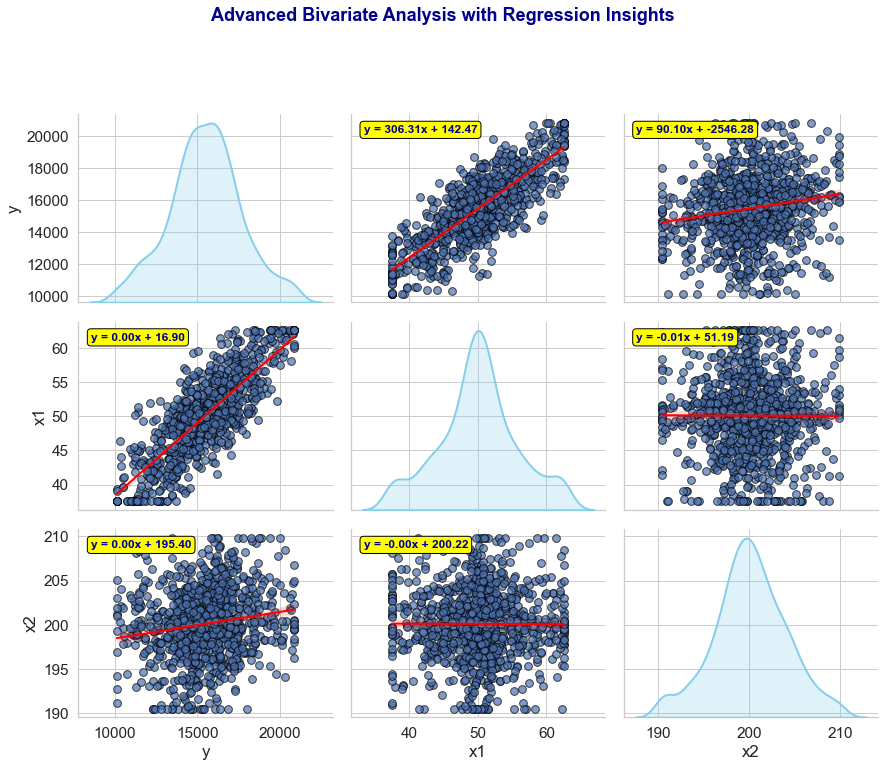

In [19]:
# Set a high-quality theme and larger font scale
sns.set_theme(style="whitegrid", font_scale=1.4)

# Define a function to annotate regression details
def annotate_regression(ax, x, y):
    # Calculate regression coefficients
    slope, intercept = np.polyfit(x, y, 1)
    ax.text(
        0.05, 0.9, f"y = {slope:.2f}x + {intercept:.2f}", 
        transform=ax.transAxes, fontsize=12, fontweight='bold',
        bbox=dict(facecolor='yellow', edgecolor='black', boxstyle='round,pad=0.3'),
        color='darkblue'
    )

# Create the pairplot with upgraded styling
pairplot = sns.pairplot(
    df[['y', 'x1', 'x2']],
    kind='reg',  # Add regression lines
    diag_kind='kde',  # Use KDE plots for diagonal
    height=3.5,  # Larger size for better visuals
    aspect=1.2,  # Wider aspect ratio
    plot_kws={
        'scatter_kws': {'alpha': 0.7, 's': 60, 'edgecolor': 'black'},  # Stylish scatter points
        'line_kws': {'color': 'red', 'linewidth': 2}  # Bold regression lines
    },
    diag_kws={'shade': True, 'color': 'skyblue', 'linewidth': 2}
)

# Annotate regression details on each scatterplot
for i, ax in enumerate(pairplot.axes.flat):
    if ax is not None:  # Avoid empty plots
        row, col = divmod(i, len(pairplot.axes))
        if row != col:  # Only annotate off-diagonal scatterplots
            x_var = df.columns[col]
            y_var = df.columns[row]
            annotate_regression(ax, df[x_var], df[y_var])

# Add a global title for the entire plot
pairplot.fig.suptitle(
    "Advanced Bivariate Analysis with Regression Insights",
    y=1.02, fontsize=18, fontweight='bold', color='darkblue'
)

# Adjust layout for perfect alignment
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the global title

# Show the final pairplot
plt.show()


In [20]:
# Compute the correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include='number').corr()

# Style the DataFrame for a visually appealing output
styled_correlation_matrix = correlation_matrix.style.background_gradient(
    cmap="coolwarm",  # Gradient color map for correlation values
    axis=None  # Apply gradient to the entire DataFrame
).format(precision=2).set_table_styles([
    {'selector': 'thead th', 'props': [('font-size', '14px'), ('font-weight', 'bold'), ('color', 'black')]},
    {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'center')]}
]).set_caption("Correlation Matrix of Numerical Features")

# Display the styled table
styled_correlation_matrix


,y,x1,x2
y,1.00,0.81,0.17
x1,0.81,1.00,-0.00
x2,0.17,-0.00,1.00


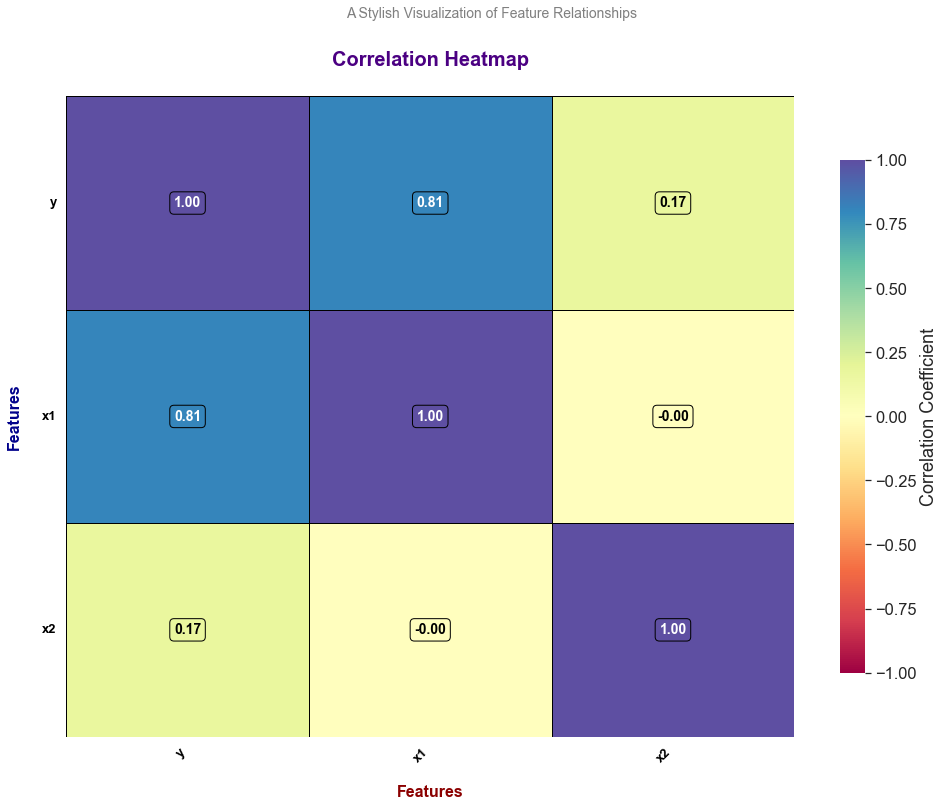

In [35]:
# Set the figure size and theme
plt.figure(figsize=(14, 12))
sns.set_theme(style="white", font_scale=1.5)

# Function for dynamic text annotation with shadow
def annotate_heatmap_with_shadow(data, cmap="Spectral", text_color_threshold=0.5):
    norm = plt.Normalize(vmin=-1, vmax=1)  # Normalize values for color scaling
    cmap = plt.cm.get_cmap(cmap)  # Get colormap

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            value = data[i, j]
            bg_color = cmap(norm(value))  # Determine background color based on value
            # Decide text color for contrast (white or black)
            text_color = "white" if (bg_color[0]*0.299 + bg_color[1]*0.587 + bg_color[2]*0.114) < 0.5 else "black"
            # Add shadow effect with black border
            plt.text(j + 0.5, i + 0.5, f"{value:.2f}",
                     ha="center", va="center", fontsize=14, fontweight='bold',
                     bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.3'),
                     color=text_color)

# Create the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    annot=False,  # Disable automatic annotations to add custom ones
    cmap="Spectral",  # Diverging color palette
    vmin=-1, vmax=1,  # Correlation range
    linewidths=1,  # Enhanced gridline width
    linecolor='black',  # Gridline color for better separation
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  # Styled colorbar
)

# Dynamically annotate heatmap cells with shadow
annotate_heatmap_with_shadow(correlation_matrix.values)

# Add titles, subtitles, and custom-styled axis labels
plt.title("Correlation Heatmap", fontsize=20, fontweight='bold', color="#4B0082", pad=30)
plt.suptitle("A Stylish Visualization of Feature Relationships", fontsize=14, color="gray", y=0.94)
plt.xlabel("Features", fontsize=16, fontweight='bold', labelpad=20, color="darkred")
plt.ylabel("Features", fontsize=16, fontweight='bold', labelpad=20, color="darkblue")

# Beautify axis tick labels
plt.xticks(rotation=45, ha="right", fontsize=13, fontweight='bold', color="black")
plt.yticks(rotation=0, fontsize=13, fontweight='bold', color="black")

# Tighten layout for a clean finish
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the heatmap
plt.show()


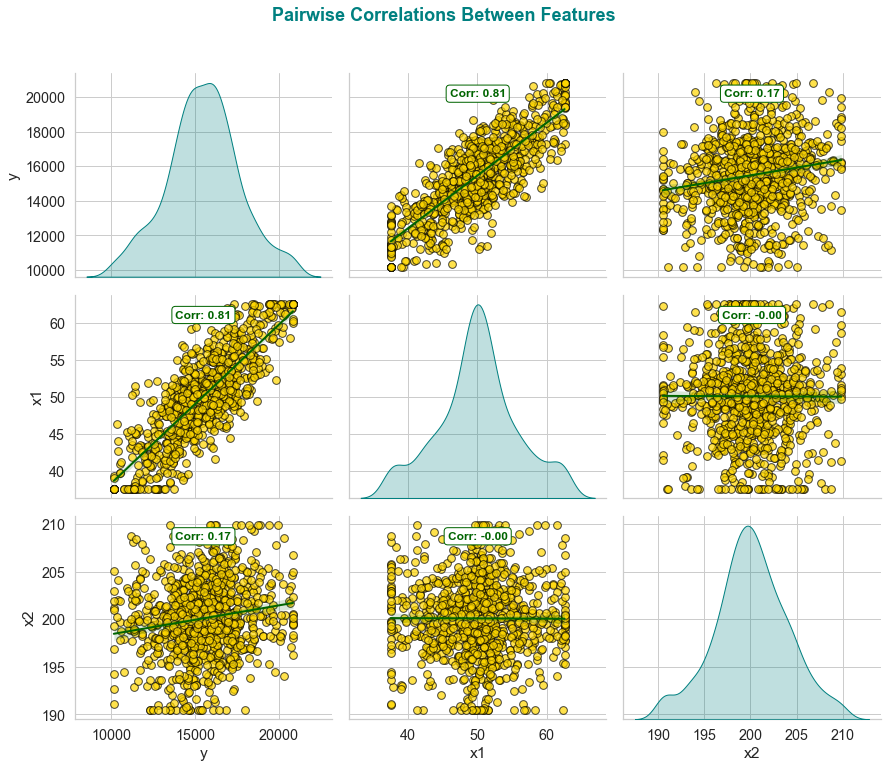

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set an advanced theme for aesthetics
sns.set_theme(style="whitegrid", font_scale=1.3)

# Define a function to annotate correlation coefficients dynamically
def annotate_correlation(ax, x, y):
    correlation = np.corrcoef(x, y)[0, 1]
    ax.text(
        0.5, 0.9, f"Corr: {correlation:.2f}",
        transform=ax.transAxes,
        ha="center", va="center",
        fontsize=12, fontweight='bold', color="darkgreen",
        bbox=dict(facecolor="white", edgecolor="darkgreen", boxstyle="round,pad=0.3")
    )

# Create a custom pairplot without conflicting scatter arguments
pairplot = sns.pairplot(
    data=df,
    kind="reg",  # Add regression lines to scatterplots
    diag_kind="kde",  # Use KDE for diagonal plots
    height=3.5,  # Larger plot size for better readability
    aspect=1.2,  # Adjust aspect ratio
    plot_kws={
        "scatter_kws": {"alpha": 0.7, "s": 60, "color": "gold", "edgecolor": "black"},  # Styled scatter points
        "line_kws": {"color": "darkgreen", "linewidth": 2},  # Dark green regression lines
    },
    diag_kws={"shade": True, "color": "teal"}  # Styled KDE plots
)

# Annotate correlation coefficients on scatterplots
for i, ax in enumerate(pairplot.axes.flat):
    if ax is not None:  # Avoid empty plots
        row, col = divmod(i, len(pairplot.axes))
        if row != col:  # Only annotate scatterplots
            x = df.iloc[:, col]
            y = df.iloc[:, row]
            annotate_correlation(ax, x, y)

# Add a global title with a distinctive design
pairplot.fig.suptitle(
    "Pairwise Correlations Between Features", 
    y=1.02, fontsize=18, fontweight="bold", color="teal"
)

# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()


# Encoding of categorical variable

Transformed DataFrame with One-Hot Encoding:
              y         x1          x2  x3_B  x3_C
0  17134.302088  50.389973  200.347091     0     1
1  17707.238688  57.115923  199.745367     0     1
2  15887.141362  55.314841  200.961109     1     0
3  12694.912392  43.529562  193.130283     1     0
4  16671.074791  45.850871  199.216353     0     0


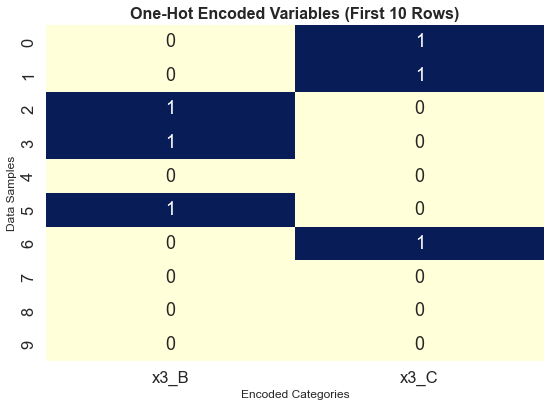

In [22]:
# Apply one-hot encoding to the 'x3' column
# drop_first=True removes the first category to prevent multicollinearity
df_encoded = pd.get_dummies(df, columns=['x3'], drop_first=True)

# Display the first few rows of the transformed DataFrame
print("Transformed DataFrame with One-Hot Encoding:")
print(df_encoded.head())

# Extract the encoded columns for visualization
encoded_columns = [col for col in df_encoded.columns if 'x3_' in col]

# Visualize the transformed data using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[encoded_columns].head(10), annot=True, cmap="YlGnBu", cbar=False)
plt.title("One-Hot Encoded Variables (First 10 Rows)", fontsize=16, fontweight="bold")
plt.xlabel("Encoded Categories", fontsize=12)
plt.ylabel("Data Samples", fontsize=12)
plt.tight_layout()
plt.show()


# Dividing data into training and testing sets

In [23]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

Target Variable (Dependent):
0    17134.302088
1    17707.238688
2    15887.141362
3    12694.912392
4    16671.074791
Name: y, dtype: float64

Feature Variables (Independent):
          x1          x2 x3
0  50.389973  200.347091  C
1  57.115923  199.745367  C
2  55.314841  200.961109  B
3  43.529562  193.130283  B
4  45.850871  199.216353  A


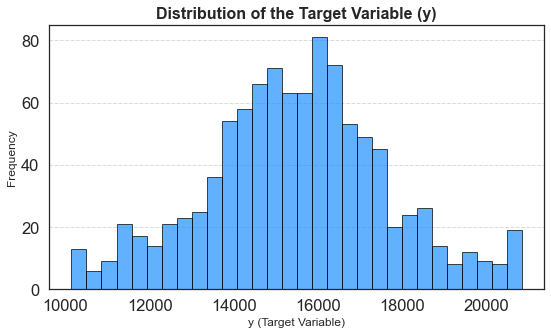

In [24]:
# Define the target variable (dependent variable)
# 'y' is the dependent variable (e.g., 'sales', 'output', etc.)
target = df['y']  

# Define the feature variables (independent variables)
# Retain all columns except the target column
features = df.drop(columns=['y'])

# Print a summary of the split
print("Target Variable (Dependent):")
print(target.head())  # Display the first few rows of the target variable

print("\nFeature Variables (Independent):")
print(features.head())  # Display the first few rows of the features DataFrame

# Visualize the features and target variables
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
plt.hist(target, bins=30, color='dodgerblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of the Target Variable (y)", fontsize=16, fontweight="bold")
plt.xlabel("y (Target Variable)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Generated Random Data with Fixed Seed:
   RandomFeature1  RandomFeature2
0        0.765988              81
1        0.565542              28
2        0.352963              19
3        0.497482              55
4        0.764414              68
5        0.987804              90
6        0.900355              78
7        0.725163              69
8        0.658607              44
9        0.085538              72


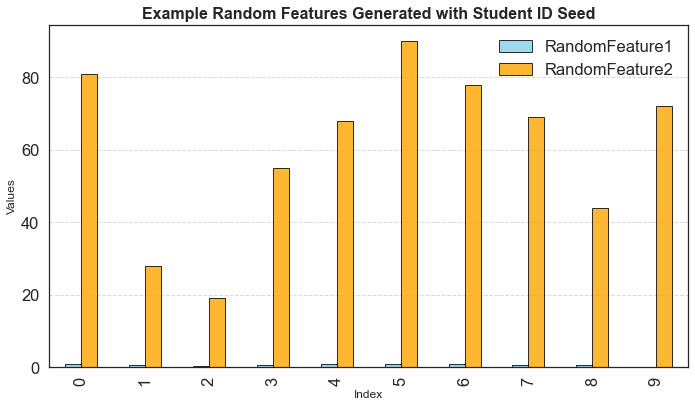

In [25]:
import numpy as np
import random
import pandas as pd

# Assign the student ID as the random seed for reproducibility
student_id_seed = 23271779

# Set the random seed for various libraries
np.random.seed(student_id_seed)  # For NumPy operations
random.seed(student_id_seed)     # For Python's built-in random module

# Example: Demonstrating reproducibility in random operations
# Generate a reproducible random DataFrame
example_data = pd.DataFrame({
    'RandomFeature1': np.random.rand(10),  # Random numbers between 0 and 1
    'RandomFeature2': np.random.randint(1, 100, 10)  # Random integers between 1 and 100
})

# Print the generated random data
print("Generated Random Data with Fixed Seed:")
print(example_data)

# Visualize the random data for insight
import matplotlib.pyplot as plt
example_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], edgecolor='black', alpha=0.8)
plt.title("Example Random Features Generated with Student ID Seed", fontsize=16, fontweight="bold")
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
# Split the dataset into training and testing subsets
# features: Independent variables (predictors)
# target: Dependent variable (target variable)
# test_size=0.2: 20% of the data is reserved for testing
# random_state ensures reproducibility using the student ID as the seed
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=student_id_seed
)

# Print the shapes of the training and testing subsets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

# Validate split proportions
total_samples = len(features)
train_samples = len(X_train)
test_samples = len(X_test)

print("\nValidation of Split Proportions:")
print(f"Total Samples: {total_samples}")
print(f"Training Samples ({(train_samples / total_samples) * 100:.2f}%): {train_samples}")
print(f"Testing Samples ({(test_samples / total_samples) * 100:.2f}%): {test_samples}")


Training Features Shape: (800, 3)
Testing Features Shape: (200, 3)
Training Target Shape: (800,)
Testing Target Shape: (200,)

Validation of Split Proportions:
Total Samples: 1000
Training Samples (80.00%): 800
Testing Samples (20.00%): 200


# Calibrate the multiple linear regression model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# Ensure categorical variables are encoded (if not already done)
# Convert non-numeric columns to dummy variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Add a constant term for the intercept (bias term)
X_train_with_const = sm.add_constant(X_train_encoded)

# Fit the Ordinary Least Squares (OLS) regression model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Display the summary of the model's performance and statistics
ols_model_summary = ols_model.summary()
print("OLS Regression Model Summary:")
print(ols_model_summary)

# Extract key metrics for interpretation
print("\nKey Model Metrics:")
print(f"R-squared: {ols_model.rsquared:.4f}")
print(f"Adjusted R-squared: {ols_model.rsquared_adj:.4f}")
print(f"F-statistic: {ols_model.fvalue:.4f} (p-value: {ols_model.f_pvalue:.4e})")


OLS Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     461.6
Date:                Sat, 30 Nov 2024   Prob (F-statistic):          1.49e-205
Time:                        21:17:33   Log-Likelihood:                -6791.1
No. Observations:                 800   AIC:                         1.359e+04
Df Residuals:                     795   BIC:                         1.362e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.831e+04 

In [29]:
# Ensure the test set matches the training set structure
# Apply one-hot encoding to categorical variables in X_test
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align X_test with X_train to ensure same feature columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Add a constant term to X_test for the intercept
X_test_with_const = sm.add_constant(X_test_encoded)

# Predict the target values using the trained model and test set
predicted_values = ols_model.predict(X_test_with_const)

# Display the first few predicted values
print("Predicted Target Values:")
print(predicted_values)


Predicted Target Values:
670    16157.237231
593    14234.200272
904    13513.134708
499    15797.600664
322    15661.067108
           ...     
95     16053.868952
430    16146.413658
692    12971.794640
886    17024.764752
501    14563.199317
Length: 200, dtype: float64



Model Evaluation Metrics:
╒═══════════════════════════════════════╤═════════════╕
│ Metric                                │       Value │
╞═══════════════════════════════════════╪═════════════╡
│ Mean Squared Error (MSE)              │ 1.88049e+06 │
├───────────────────────────────────────┼─────────────┤
│ Mean Absolute Percentage Error (MAPE) │ 0.0716      │
╘═══════════════════════════════════════╧═════════════╛


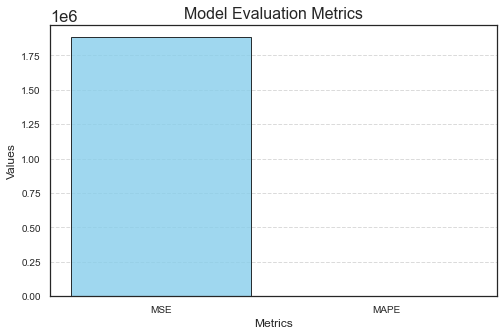

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tabulate import tabulate
import matplotlib.pyplot as plt

# Ensure the test set matches the training set structure
# Apply one-hot encoding to categorical variables in X_test
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align X_test with X_train to ensure the same feature columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Add a constant term to X_test for the intercept
X_test_with_const = sm.add_constant(X_test_encoded)

# Predict the target values using the trained model and test set
y_predicted_values = ols_model.predict(X_test_with_const)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_predicted_values)
mape = mean_absolute_percentage_error(y_test, y_predicted_values)

# Print evaluation metrics in a tabular format
metrics_table = [
    ["Mean Squared Error (MSE)", f"{mse:.4f}"],
    ["Mean Absolute Percentage Error (MAPE)", f"{mape:.4f}"]
]

print("\nModel Evaluation Metrics:")
print(tabulate(metrics_table, headers=["Metric", "Value"], tablefmt="fancy_grid"))

# Create a bar chart for the metrics
metrics = ["MSE", "MAPE"]
values = [mse, mape]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'orange'], alpha=0.8, edgecolor='black')
plt.title("Model Evaluation Metrics", fontsize=16)
plt.ylabel("Values", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



Root Mean Squared Error (RMSE): 1371.3095


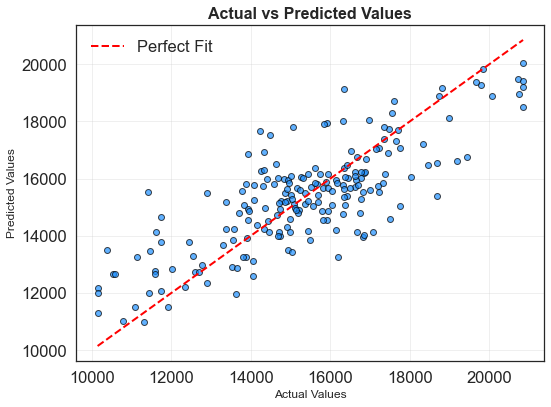

In [32]:
# Calculate the Root Mean Squared Error (RMSE) to evaluate the model's prediction accuracy
root_mean_square_error = mean_squared_error(y_test, y_predicted_values, squared=False)

# Display the RMSE value to assess the model's error
print("Root Mean Squared Error (RMSE):", round(root_mean_square_error, 4))

# Visualize Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predicted_values, color='dodgerblue', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, linestyle="--", label="Perfect Fit")
plt.title("Actual vs Predicted Values", fontsize=16, fontweight="bold")
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


R-squared (R²): 0.6338


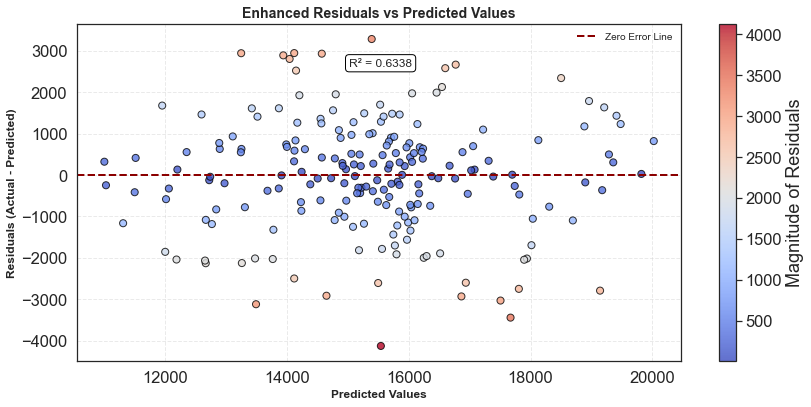

In [33]:
from sklearn.metrics import r2_score

# Calculate the R-squared value to evaluate the model's performance
r_squared_value = r2_score(y_test, y_predicted_values)
print("R-squared (R²):", round(r_squared_value, 4))

# Residuals = Actual - Predicted
residuals = y_test - y_predicted_values

# Adjust figure size to fit the entire plot within one view
plt.figure(figsize=(12, 6))  # Wider and shorter aspect ratio for better fit

# Scatterplot with a gradient color based on residual magnitude
scatter = plt.scatter(
    y_predicted_values, residuals, 
    c=np.abs(residuals), cmap="coolwarm", edgecolor="black", alpha=0.8, s=50
)

# Add the colorbar (with no interference from gridlines)
plt.colorbar(scatter, label="Magnitude of Residuals")

# Add a zero-error reference line
plt.axhline(y=0, color="darkred", linestyle="--", linewidth=2, label="Zero Error Line")

# Titles and labels
plt.title("Enhanced Residuals vs Predicted Values", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Values", fontsize=12, fontweight="bold")
plt.ylabel("Residuals (Actual - Predicted)", fontsize=12, fontweight="bold")

# Add annotations for R-squared
plt.text(
    max(y_predicted_values) * 0.75, max(residuals) * 0.8,
    f"R² = {round(r_squared_value, 4)}",
    fontsize=12, bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3")
)

# Gridlines (added explicitly after colorbar)
plt.grid(alpha=0.4, linestyle="--")

# Add legend
plt.legend(fontsize=10, loc="upper right")

# Tight layout ensures everything fits properly within the figure
plt.tight_layout()
plt.show()


In [110]:
# Calculate residuals (errors)
prediction_errors = y_test - y_predicted_values

# Calculate the mean of residuals
average_residual = prediction_errors.mean()

# Display the mean of residuals
print(f"Mean of Residuals (Average Error): {average_residual:.4f}")


Mean of Residuals (Average Error): -7.7196
